In [1]:
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import *
from keras.datasets import mnist
import keras.backend as K
import matplotlib.pyplot as plt

K.set_image_data_format('channels_last')

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
print('x_train.shape : ', x_train.shape)
print('x_test.shape : ', x_test.shape)

x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
print('x_train.reshape : ', x_train.shape)
print('x_test.reshape : ', x_test.shape)

x_train.shape :  (60000, 28, 28)
x_test.shape :  (10000, 28, 28)
x_train.reshape :  (60000, 784)
x_test.reshape :  (10000, 784)


In [3]:
AE = Sequential(name = 'Vanilla-Auto-Encoder')

# input layer
AE.add(Input(784))

# Latent layer. (Encoding)
AE.add(Dense(256))
AE.add(Activation('relu'))

# output layer. (Decoding)
AE.add(Dense(784))
       
AE.summary()

Model: "Vanilla-Auto-Encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 784)               201488    
                                                                 
Total params: 402,448
Trainable params: 402,448
Non-trainable params: 0
_________________________________________________________________


In [4]:
AE.compile(optimizer='adam', loss='mse')
history = AE.fit(x_train, x_train, validation_split=0.2 ,batch_size=100, epochs=50, verbose=1)

Epoch 1/50
480/480 [==============================] - 1s 2ms/step - loss: 0.0201 - val_loss: 0.0081
Epoch 2/50
480/480 [==============================] - 1s 1ms/step - loss: 0.0066 - val_loss: 0.0056
Epoch 3/50
480/480 [==============================] - 1s 1ms/step - loss: 0.0051 - val_loss: 0.0047
Epoch 4/50
480/480 [==============================] - 1s 1ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 5/50
480/480 [==============================] - 1s 1ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 6/50
480/480 [==============================] - 1s 1ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 7/50
480/480 [==============================] - 1s 1ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 8/50
480/480 [==============================] - 1s 1ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 9/50
480/480 [==============================] - 1s 2ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 10/50
480/480 [==============================] - 1s 1ms/step - loss: 0.0035 - val_loss: 0.0035

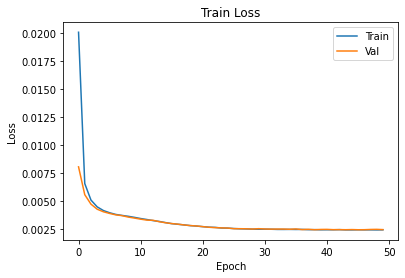

In [5]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')

[47850 57939 34910 ... 43238 18452 52145]
313/313 [==============================] - 0s 537us/step


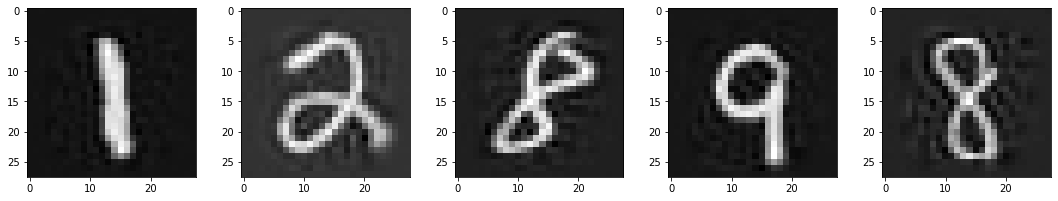

In [6]:
idx = np.random.choice(60000, 10000)
print(idx)
preds = AE.predict(x_train[idx])

f, ax = plt.subplots(1,5)
f.set_size_inches(15, 4)
f.tight_layout()

for i in range(5):
   ax[i].imshow(preds[i].reshape(28, 28), cmap='gray')
    
plt.show()

# Early Stopping and Model Check Point

In [7]:
AE.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss',patience=2, verbose=1)
model_checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)
history = AE.fit(x_train, x_train, validation_split=0.2 ,batch_size=100, epochs=50, verbose=1, 
                 callbacks=[early_stopping, model_checkpoint])

Epoch 1/50
480/480 [==============================] - 1s 2ms/step - loss: 0.0192 - val_loss: 0.0078
Epoch 2/50
480/480 [==============================] - 1s 1ms/step - loss: 0.0063 - val_loss: 0.0053
Epoch 3/50
480/480 [==============================] - 1s 2ms/step - loss: 0.0048 - val_loss: 0.0045
Epoch 4/50
480/480 [==============================] - 1s 1ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 5/50
480/480 [==============================] - 1s 1ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 6/50
480/480 [==============================] - 1s 1ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 7/50
480/480 [==============================] - 1s 1ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 8/50
480/480 [==============================] - 1s 1ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 9/50
480/480 [==============================] - 1s 2ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 10/50
480/480 [==============================] - 1s 1ms/step - loss: 0.0033 - val_loss: 0.0033

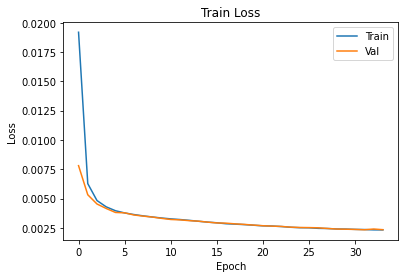

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')

[5109 9840 1948 ... 8651 1636 6393]
125/125 [==============================] - 0s 1ms/step


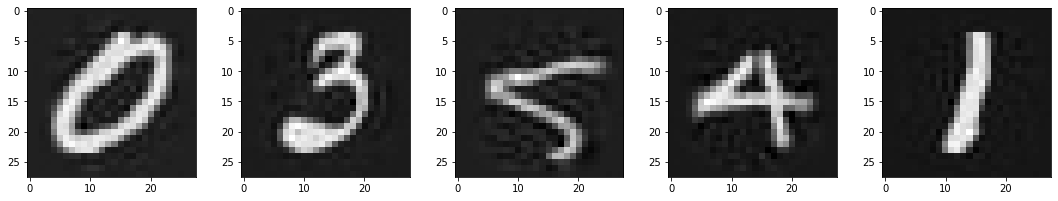

In [14]:
idx = np.random.choice(10000, 4000)
print(idx)

best_AE =load_model('best_model.h5')
preds = best_AE.predict(x_test[idx])

f, ax = plt.subplots(1,5)
f.set_size_inches(15, 4)
f.tight_layout()

for i in range(5):
    ax[i].imshow(preds[i].reshape(28, 28), cmap='gray')
    
plt.show()